In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # I added this
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
import seaborn as sn
import scipy.io as sio
import os


import pandas as pd
import numpy as np
import time
import seaborn as sn


## Read the Data

In [2]:
def second_step(X, orgin, numComponents):
  # standardize the features

  sc = StandardScaler()
  #X_std = sc.fit_transform(X)
  #orgin_std = sc.fit_transform(orgin)

  # Calculate the covariance matrix first
  
  correlation_matrix = np.corrcoef(orgin.T)
  #covariance_matrix1 = np.cov(orgin.T)
  covariance_matrix = np.cov(X.T)   # The result is a Positive semidefinite matrix
  print(correlation_matrix.shape, covariance_matrix.shape)
  final_matrix = covariance_matrix - correlation_matrix
  print(max(pd.DataFrame(final_matrix)))
  # Eigendecomposition of the covariance
  eigen_values, eigen_vectors = np.linalg.eig(final_matrix)
  # Calculate the variance explained on each of those components
  variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
  # Calculate the cumulative sum of variance explained
  cumulative_variance_explained = np.cumsum(variance_explained)
  #Taking two components and create a projection matrix
  projection_matrix = (eigen_vectors.T[:][:numComponents]).T
  
  X_IDA1 = X.dot(projection_matrix)

  return X_IDA1

In [3]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  #q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = X)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[1])]+['class']

  return df

In [4]:
from skimage.morphology import reconstruction
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

def IDA(X1, y1, band_no, numComponents):
    
  df = extract_pixels(X1, y1)
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]

  X_mean = X
  X_mean['mean'] = X_mean.mean(axis=1)
  Avr = [X_mean['mean']]
  rep_Avr = np.repeat(Avr, band_no)
  rep_Avr =np.reshape(rep_Avr, (-1,band_no))
  main_X = X.iloc[:, :-1]
  seed = main_X - rep_Avr
  dilated = reconstruction(seed.values, main_X.values)
  hdome = main_X - dilated
  X = second_step(hdome,X.iloc[:, :-1], numComponents)
  scaler = QuantileTransformer(n_quantiles=15, random_state=0,output_distribution='normal') #
  scaler = scaler.fit_transform(X)
 
  
  return scaler, y 

In [53]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('aa.csv')
Xx = dataset.iloc[:, 1:15].values
yy = dataset.iloc[:, 15].values

In [54]:
import time
numComponents = 6
band_no = Xx.shape[1]
K = numComponents  # The target number of bands
training_start_time = time.time()
X1, y1 = IDA(Xx,yy, band_no, numComponents)
training_end_time = time.time()
X1.shape, y1.shape

(14, 14) (14, 14)
13


((158, 6), (158,))

In [55]:
print("preprocessing time : ", training_end_time - training_start_time )
preprocessing_time = training_end_time - training_start_time 

preprocessing time :  0.019751787185668945


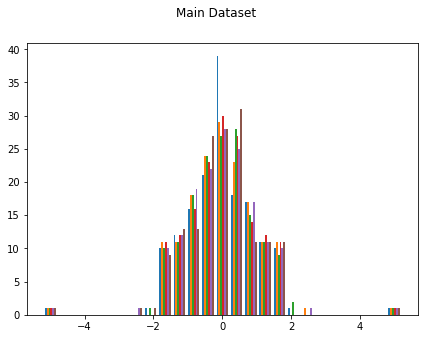

In [64]:
from matplotlib import pyplot
pyplot.figure(figsize=(7,5))
pyplot.hist(X1[:,:], bins=25)
pyplot.suptitle("Main Dataset")
pyplot.show()


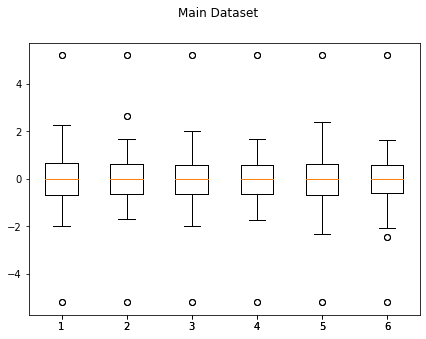

array([-5.19933758,  5.19933758])

In [65]:
pyplot.figure(figsize=(7,5))
c = pyplot.boxplot(X1[:,:])
top_points = c["fliers"][0].get_data()[1]
pyplot.boxplot(X1[:,:])
pyplot.suptitle("Main Dataset")
pyplot.show()
top_points